In [4]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [25]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import hashlib

In [9]:
# Path to dataset folder
DATASET_PATH = r"C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix"

In [11]:
people = set()
pose_angles = set()
missing_files = []
seen_files = {}
duplicates = []

# Expected pose angles
expected_poses = list(range(-90, 91))

# Helper function to calculate a file's hash
def file_hash(filepath):
    with open(filepath, 'rb') as f:
        return hashlib.md5(f.read()).hexdigest()

In [12]:
# Walk through all subfolders and files
for root, dirs, files in os.walk(DATASET_PATH):
    for file in files:
        if file.endswith('.jpg'):
            try:
                # Extract person and angle from filename
                basename = os.path.splitext(file)[0]
                person_str, angle_str = basename.split('(')
                person_id = int(person_str)
                angle = int(angle_str.rstrip(')'))

                filepath = os.path.join(root, file)
                people.add(person_id)
                pose_angles.add(angle)

                # Check for duplicate filenames with different paths
                file_id = f"{person_id}({angle})"
                hash_val = file_hash(filepath)

                if file_id in seen_files:
                    if seen_files[file_id]["hash"] == hash_val:
                        duplicates.append(filepath)
                        os.remove(filepath)
                        print(f"Removed exact duplicate: {filepath}")
                    else:
                        print(f"Warning: Conflicting file with same name but different content: {filepath}")
                else:
                    seen_files[file_id] = {"path": filepath, "hash": hash_val}

            except Exception as e:
                print(f"Error parsing file: {file} -> {e}")

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\1(-1).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\1(-10).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\1(-11).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\1(-12).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\1(-13).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\1(-14).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\1(-15).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\1(-16).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\1(-17).jpg
Removed exact duplicate: C:\Users\Administrator

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\1(-81).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\1(-82).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\1(-83).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\1(-84).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\1(-85).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\1(-86).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\1(-87).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\1(-88).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\1(-89).jpg
Removed exact duplicate: C:\Users\Administrato

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\10(-11).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\10(-12).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\10(-13).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\10(-14).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\10(-15).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\10(-16).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\10(-17).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\10(-18).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\10(-19).jpg
Removed exact duplicate: C:\Users\Adm

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\10(16).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\10(17).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\10(18).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\10(19).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\10(2).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\10(20).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\10(21).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\10(22).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\10(23).jpg
Removed exact duplicate: C:\Users\Administrator

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\11(-25).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\11(-26).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\11(-27).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\11(-28).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\11(-29).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\11(-3).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\11(-30).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\11(-31).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\11(-32).jpg
Removed exact duplicate: C:\Users\Admi

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\11(30).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\11(31).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\11(32).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\11(33).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\11(34).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\11(35).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\11(36).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\11(37).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\11(38).jpg
Removed exact duplicate: C:\Users\Administrato

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\12(-39).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\12(-4).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\12(-40).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\12(-41).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\12(-42).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\12(-43).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\12(-44).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\12(-45).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\12(-46).jpg
Removed exact duplicate: C:\Users\Admi

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\12(45).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\12(46).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\12(47).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\12(48).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\12(49).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\12(5).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\12(50).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\12(51).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\12(52).jpg
Removed exact duplicate: C:\Users\Administrator

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\13(-50).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\13(-51).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\13(-52).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\13(-53).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\13(-54).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\13(-55).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\13(-56).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\13(-57).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\13(-58).jpg
Removed exact duplicate: C:\Users\Adm

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\13(46).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\13(47).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\13(48).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\13(49).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\13(5).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\13(50).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\13(51).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\13(52).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\13(53).jpg
Removed exact duplicate: C:\Users\Administrator

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\14(-44).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\14(-45).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\14(-46).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\14(-47).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\14(-48).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\14(-49).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\14(-5).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\14(-50).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\14(-51).jpg
Removed exact duplicate: C:\Users\Admi

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\14(54).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\14(55).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\14(56).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\14(57).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\14(58).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\14(59).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\14(6).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\14(60).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\14(61).jpg
Removed exact duplicate: C:\Users\Administrator

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\15(-69).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\15(-7).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\15(-70).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\15(-71).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\15(-72).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\15(-73).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\15(-74).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\15(-75).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\15(-76).jpg
Removed exact duplicate: C:\Users\Admi

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\15(8).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\15(80).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\15(81).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\15(82).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\15(83).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\15(84).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\15(85).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\15(86).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\15(87).jpg
Removed exact duplicate: C:\Users\Administrator

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\16(-77).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\16(-78).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\16(-79).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\16(-8).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\16(-80).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\16(-81).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\16(-82).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\16(-83).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\16(-84).jpg
Removed exact duplicate: C:\Users\Admi

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\16(9).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\16(90).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\17(-1).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\17(-10).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\17(-11).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\17(-12).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\17(-13).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\17(-14).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\17(-15).jpg
Removed exact duplicate: C:\Users\Adminis

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\17(-8).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\17(-80).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\17(-81).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\17(-82).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\17(-83).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\17(-84).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\17(-85).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\17(-86).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\17(-87).jpg
Removed exact duplicate: C:\Users\Admi

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\17(69).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\17(7).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\17(70).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\17(71).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\17(72).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\17(73).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\17(74).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\17(75).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\17(76).jpg
Removed exact duplicate: C:\Users\Administrator

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\18(-59).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\18(-6).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\18(-60).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\18(-61).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\18(-62).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\18(-63).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\18(-64).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\18(-65).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\18(-66).jpg
Removed exact duplicate: C:\Users\Admi

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\18(49).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\18(5).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\18(50).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\18(51).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\18(52).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\18(53).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\18(54).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\18(55).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\18(56).jpg
Removed exact duplicate: C:\Users\Administrator

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\19(-49).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\19(-5).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\19(-50).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\19(-51).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\19(-52).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\19(-53).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\19(-54).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\19(-55).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\19(-56).jpg
Removed exact duplicate: C:\Users\Admi

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\19(54).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\19(55).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\19(56).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\19(57).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\19(58).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\19(59).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\19(6).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\19(60).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\19(61).jpg
Removed exact duplicate: C:\Users\Administrator

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\2(-47).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\2(-48).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\2(-49).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\2(-5).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\2(-50).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\2(-51).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\2(-52).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\2(-53).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\2(-54).jpg
Removed exact duplicate: C:\Users\Administrator

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\2(45).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\2(46).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\2(47).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\2(48).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\2(49).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\2(5).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\2(50).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\2(51).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\2(52).jpg
Removed exact duplicate: C:\Users\Administrator\Document

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\20(-54).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\20(-55).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\20(-56).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\20(-57).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\20(-58).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\20(-59).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\20(-6).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\20(-60).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\20(-61).jpg
Removed exact duplicate: C:\Users\Admi

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\20(61).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\20(62).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\20(63).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\20(64).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\20(65).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\20(66).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\20(67).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\20(68).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\20(69).jpg
Removed exact duplicate: C:\Users\Administrato

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\21(-54).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\21(-55).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\21(-56).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\21(-57).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\21(-58).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\21(-59).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\21(-6).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\21(-60).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\21(-61).jpg
Removed exact duplicate: C:\Users\Admi

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\21(60).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\21(61).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\21(62).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\21(63).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\21(64).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\21(65).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\21(66).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\21(67).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\21(68).jpg
Removed exact duplicate: C:\Users\Administrato

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\22(-5).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\22(-50).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\22(-51).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\22(-52).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\22(-53).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\22(-54).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\22(-55).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\22(-56).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\22(-57).jpg
Removed exact duplicate: C:\Users\Admi

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\22(40).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\22(41).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\22(42).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\22(43).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\22(44).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\22(45).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\22(46).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\22(47).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\22(48).jpg
Removed exact duplicate: C:\Users\Administrato

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\23(-41).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\23(-42).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\23(-43).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\23(-44).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\23(-45).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\23(-46).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\23(-47).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\23(-48).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\23(-49).jpg
Removed exact duplicate: C:\Users\Adm

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\23(3).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\23(30).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\23(31).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\23(32).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\23(33).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\23(34).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\23(35).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\23(36).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\23(37).jpg
Removed exact duplicate: C:\Users\Administrator

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\24(-27).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\24(-28).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\24(-29).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\24(-3).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\24(-30).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\24(-31).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\24(-32).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\24(-33).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\24(-34).jpg
Removed exact duplicate: C:\Users\Admi

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\24(16).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\24(17).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\24(18).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\24(19).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\24(2).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\24(20).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\24(21).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\24(22).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\24(23).jpg
Removed exact duplicate: C:\Users\Administrator

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\25(-32).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\25(-33).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\25(-34).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\25(-35).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\25(-36).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\25(-37).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\25(-38).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\25(-39).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\25(-4).jpg
Removed exact duplicate: C:\Users\Admi

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\25(24).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\25(25).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\25(26).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\25(27).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\25(28).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\25(29).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\25(3).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\25(30).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\25(31).jpg
Removed exact duplicate: C:\Users\Administrator

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\26(-16).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\26(-17).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\26(-18).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\26(-19).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\26(-2).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\26(-20).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\26(-21).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\26(-22).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\26(-23).jpg
Removed exact duplicate: C:\Users\Admi

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\26(11).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\26(12).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\26(13).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\26(14).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\26(15).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\26(16).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\26(17).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\26(18).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\26(19).jpg
Removed exact duplicate: C:\Users\Administrato

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\26(84).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\26(85).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\26(86).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\26(87).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\26(88).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\26(89).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\26(9).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\26(90).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\27(-1).jpg
Removed exact duplicate: C:\Users\Administrator

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\27(-79).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\27(-8).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\27(-80).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\27(-81).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\27(-82).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\27(-83).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\27(-84).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\27(-85).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\27(-86).jpg
Removed exact duplicate: C:\Users\Admi

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\27(71).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\27(72).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\27(73).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\27(74).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\27(75).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\27(76).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\27(77).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\27(78).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\27(79).jpg
Removed exact duplicate: C:\Users\Administrato

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\28(-66).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\28(-67).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\28(-68).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\28(-69).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\28(-7).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\28(-70).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\28(-71).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\28(-72).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\28(-73).jpg
Removed exact duplicate: C:\Users\Admi

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\28(56).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\28(57).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\28(58).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\28(59).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\28(6).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\28(60).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\28(61).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\28(62).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\28(63).jpg
Removed exact duplicate: C:\Users\Administrator

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\29(-45).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\29(-46).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\29(-47).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\29(-48).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\29(-49).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\29(-5).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\29(-50).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\29(-51).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\29(-52).jpg
Removed exact duplicate: C:\Users\Admi

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\29(46).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\29(47).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\29(48).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\29(49).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\29(5).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\29(50).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\29(51).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\29(52).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\29(53).jpg
Removed exact duplicate: C:\Users\Administrator

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\3(-42).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\3(-43).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\3(-44).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\3(-45).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\3(-46).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\3(-47).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\3(-48).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\3(-49).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\3(-5).jpg
Removed exact duplicate: C:\Users\Administrator

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\3(52).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\3(53).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\3(54).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\3(55).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\3(56).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\3(57).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\3(58).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\3(59).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\3(6).jpg
Removed exact duplicate: C:\Users\Administrator\Document

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\30(-60).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\30(-61).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\30(-62).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\30(-63).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\30(-64).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\30(-65).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\30(-66).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\30(-67).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\30(-68).jpg
Removed exact duplicate: C:\Users\Adm

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\30(5).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\30(50).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\30(51).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\30(52).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\30(53).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\30(54).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\30(55).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\30(56).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\30(57).jpg
Removed exact duplicate: C:\Users\Administrator

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\4(-52).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\4(-53).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\4(-54).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\4(-55).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\4(-56).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\4(-57).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\4(-58).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\4(-59).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\4(-6).jpg
Removed exact duplicate: C:\Users\Administrator

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\4(53).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\4(54).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\4(55).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\4(56).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\4(57).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\4(58).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\4(59).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\4(6).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\4(60).jpg
Removed exact duplicate: C:\Users\Administrator\Document

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\5(-43).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\5(-44).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\5(-45).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\5(-46).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\5(-47).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\5(-48).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\5(-49).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\5(-5).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\5(-50).jpg
Removed exact duplicate: C:\Users\Administrator

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\5(33).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\5(34).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\5(35).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\5(36).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\5(37).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\5(38).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\5(39).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\5(4).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\5(40).jpg
Removed exact duplicate: C:\Users\Administrator\Document

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\6(-32).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\6(-33).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\6(-34).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\6(-35).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\6(-36).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\6(-37).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\6(-38).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\6(-39).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\6(-4).jpg
Removed exact duplicate: C:\Users\Administrator

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\6(29).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\6(3).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\6(30).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\6(31).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\6(32).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\6(33).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\6(34).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\6(35).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\6(36).jpg
Removed exact duplicate: C:\Users\Administrator\Document

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\7(-31).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\7(-32).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\7(-33).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\7(-34).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\7(-35).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\7(-36).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\7(-37).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\7(-38).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\7(-39).jpg
Removed exact duplicate: C:\Users\Administrato

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\7(43).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\7(44).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\7(45).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\7(46).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\7(47).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\7(48).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\7(49).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\7(5).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\7(50).jpg
Removed exact duplicate: C:\Users\Administrator\Document

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\8(-48).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\8(-49).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\8(-5).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\8(-50).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\8(-51).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\8(-52).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\8(-53).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\8(-54).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\8(-55).jpg
Removed exact duplicate: C:\Users\Administrator

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\8(4).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\8(40).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\8(41).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\8(42).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\8(43).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\8(44).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\8(45).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\8(46).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\8(47).jpg
Removed exact duplicate: C:\Users\Administrator\Document

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\9(-30).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\9(-31).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\9(-32).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\9(-33).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\9(-34).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\9(-35).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\9(-36).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\9(-37).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\9(-38).jpg
Removed exact duplicate: C:\Users\Administrato

Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\9(33).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\9(34).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\9(35).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\9(36).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\9(37).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\9(38).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\9(39).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\9(4).jpg
Removed exact duplicate: C:\Users\Administrator\Documents\Sunny's ALU\Heimdall\FacePix\FacePix\9(40).jpg
Removed exact duplicate: C:\Users\Administrator\Document

In [13]:
# Check for missing files based on filename pattern
for person_id in range(1, 31):
    for angle in expected_poses:
        file_id = f"{person_id}({angle})"
        if file_id not in seen_files:
            missing_files.append(file_id)

In [14]:
# Final report
print(f"\nTotal unique people found: {len(people)}")
print(f"Total unique pose angles found: {len(pose_angles)}")
print(f"Missing images: {len(missing_files)}")
print(f"Duplicates removed: {len(duplicates)}")


Total unique people found: 30
Total unique pose angles found: 181
Missing images: 0
Duplicates removed: 5430


In [15]:
bad_images = []
image_shapes = set()
image_types = set()

for root, _, files in os.walk(DATASET_PATH):
    for file in files:
        if file.endswith(".jpg"):
            path = os.path.join(root, file)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                bad_images.append(path)
            else:
                image_shapes.add(img.shape)
                image_types.add(img.dtype)

print(f"Unique image shapes: {image_shapes}")
print(f"Image data types: {image_types}")
print(f"Corrupt images: {len(bad_images)}")

Unique image shapes: {(60, 51)}
Image data types: {dtype('uint8')}
Corrupt images: 0


In [16]:
#Count Images per Person
from collections import defaultdict

person_image_counts = defaultdict(int)

for file in os.listdir(DATASET_PATH):
    if file.endswith(".jpg"):
        person_id = int(file.split('(')[0])
        person_image_counts[person_id] += 1

for pid in sorted(person_image_counts):
    print(f"Person {pid:02d}: {person_image_counts[pid]} images")

Person 01: 181 images
Person 02: 181 images
Person 03: 181 images
Person 04: 181 images
Person 05: 181 images
Person 06: 181 images
Person 07: 181 images
Person 08: 181 images
Person 09: 181 images
Person 10: 181 images
Person 11: 181 images
Person 12: 181 images
Person 13: 181 images
Person 14: 181 images
Person 15: 181 images
Person 16: 181 images
Person 17: 181 images
Person 18: 181 images
Person 19: 181 images
Person 20: 181 images
Person 21: 181 images
Person 22: 181 images
Person 23: 181 images
Person 24: 181 images
Person 25: 181 images
Person 26: 181 images
Person 27: 181 images
Person 28: 181 images
Person 29: 181 images
Person 30: 181 images


In [17]:
#Pose Angle Distribution
pose_counts = defaultdict(int)

for file in os.listdir(DATASET_PATH):
    if file.endswith(".jpg"):
        pose_str = file.split('(')[1].rstrip(').jpg')
        pose = int(pose_str)
        pose_counts[pose] += 1

missing_angles = [angle for angle in range(-90, 91) if pose_counts[angle] == 0]

print(f"Total unique poses found: {len(pose_counts)}")
print(f"Missing angles: {missing_angles}")

Total unique poses found: 181
Missing angles: []


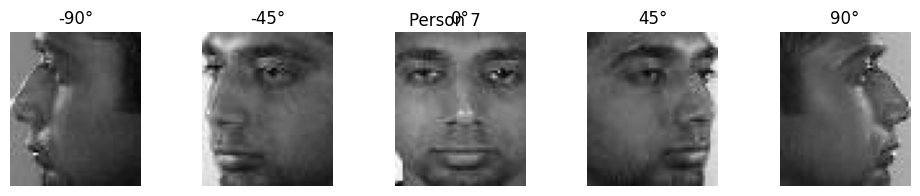

In [18]:
#View Sample Faces
def show_faces(person_id, angles=[-90, -45, 0, 45, 90]):
    plt.figure(figsize=(12, 2))
    for i, angle in enumerate(angles):
        file = f"{person_id}({angle}).jpg"
        path = os.path.join(DATASET_PATH, file)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            plt.subplot(1, len(angles), i+1)
            plt.imshow(img, cmap='gray')
            plt.title(f"{angle}°")
            plt.axis('off')
    plt.suptitle(f"Person {person_id}")
    plt.show()

show_faces(7)  # or any ID from 1–30

In [19]:
#Replace Person IDs with Names
id_to_name = {
    1: "Aisha", 2: "Ben", 3: "Carlos", 4: "Dina", 5: "Elijah",
    6: "Fatima", 7: "George", 8: "Hana", 9: "Ibrahim", 10: "Jade",
    11: "Kofi", 12: "Lena", 13: "Mohammed", 14: "Nina", 15: "Oscar",
    16: "Priya", 17: "Quinn", 18: "Ravi", 19: "Sofia", 20: "Tariq",
    21: "Uma", 22: "Victor", 23: "Wendy", 24: "Xander", 25: "Yara",
    26: "Zain", 27: "Amara", 28: "Bruno", 29: "Cleo", 30: "Darius"
}

In [22]:
#Extract Metadata From Images
records = []

for file in os.listdir(DATASET_PATH):
    if file.endswith(".jpg"):
        try:
            person_str, angle_str = file.split('(')
            person_id = int(person_str)
            pose_angle = int(angle_str.rstrip(').jpg'))
            person_name = id_to_name[person_id]
            file_path = os.path.join(DATASET_PATH, file)

            records.append({
                "file_path": file_path,
                "person_id": person_id,
                "person_name": person_name,
                "pose_angle": pose_angle
            })

        except Exception as e:
            print(f"Error parsing {file}: {e}")

In [26]:
#Create and Inspect DataFrame
df = pd.DataFrame(records)
print(df.head())

                                           file_path  person_id person_name  \
0  C:\Users\Administrator\Documents\Sunny's ALU\H...          1       Aisha   
1  C:\Users\Administrator\Documents\Sunny's ALU\H...          1       Aisha   
2  C:\Users\Administrator\Documents\Sunny's ALU\H...          1       Aisha   
3  C:\Users\Administrator\Documents\Sunny's ALU\H...          1       Aisha   
4  C:\Users\Administrator\Documents\Sunny's ALU\H...          1       Aisha   

   pose_angle  
0          -1  
1         -10  
2         -11  
3         -12  
4         -13  


In [27]:
df.to_csv("facepix_metadata_named.csv", index=False)
print("Saved metadata to facepix_metadata_named.csv")

Saved metadata to facepix_metadata_named.csv


## Visualize Pose Angle Distribution Per Person

In [29]:
# Group and Count Pose Angles
import seaborn as sns

# Optional: improves plot style
sns.set(style="whitegrid")

# Count poses per person
pose_counts = df.groupby(['person_name', 'pose_angle']).size().reset_index(name='count')

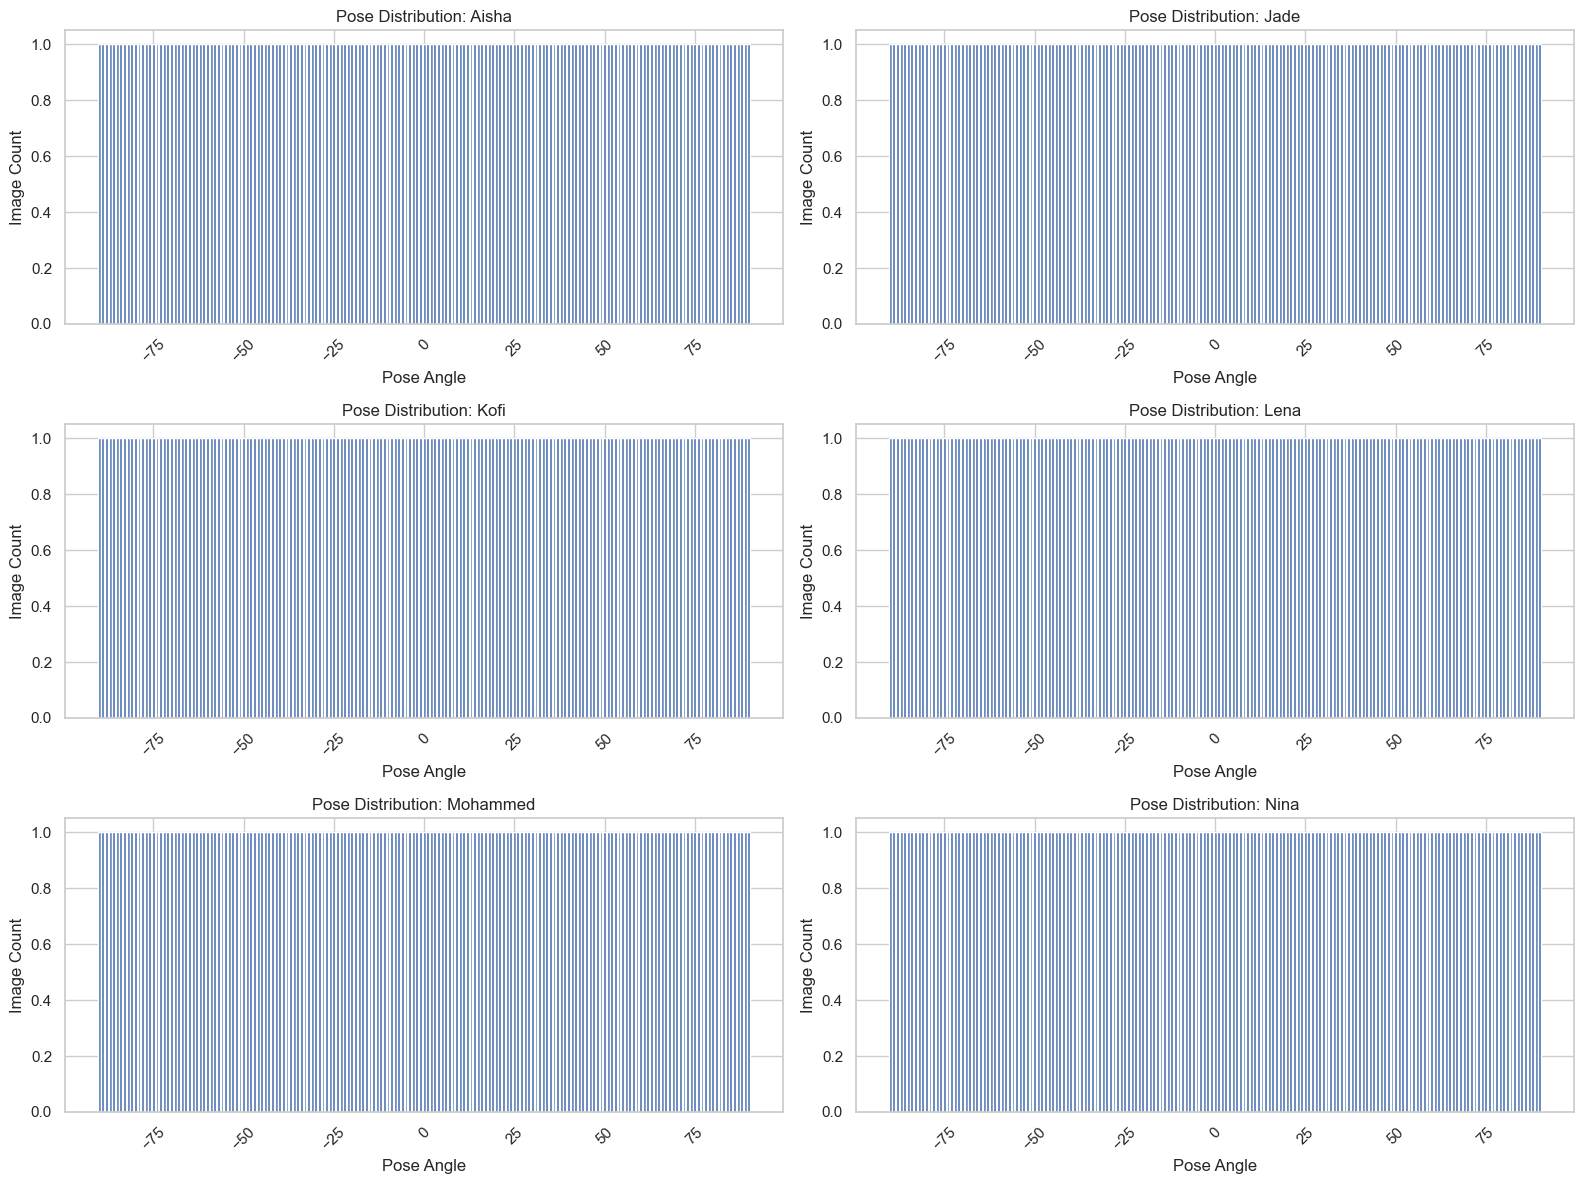

In [30]:
# Plot as Faceted Bar Charts
subset_names = df["person_name"].unique()[:6]  # adjust or remove slicing for all

plt.figure(figsize=(16, 12))

for i, name in enumerate(subset_names):
    person_data = pose_counts[pose_counts["person_name"] == name]
    plt.subplot(3, 2, i+1)
    plt.bar(person_data["pose_angle"], person_data["count"])
    plt.title(f"Pose Distribution: {name}")
    plt.xlabel("Pose Angle")
    plt.ylabel("Image Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

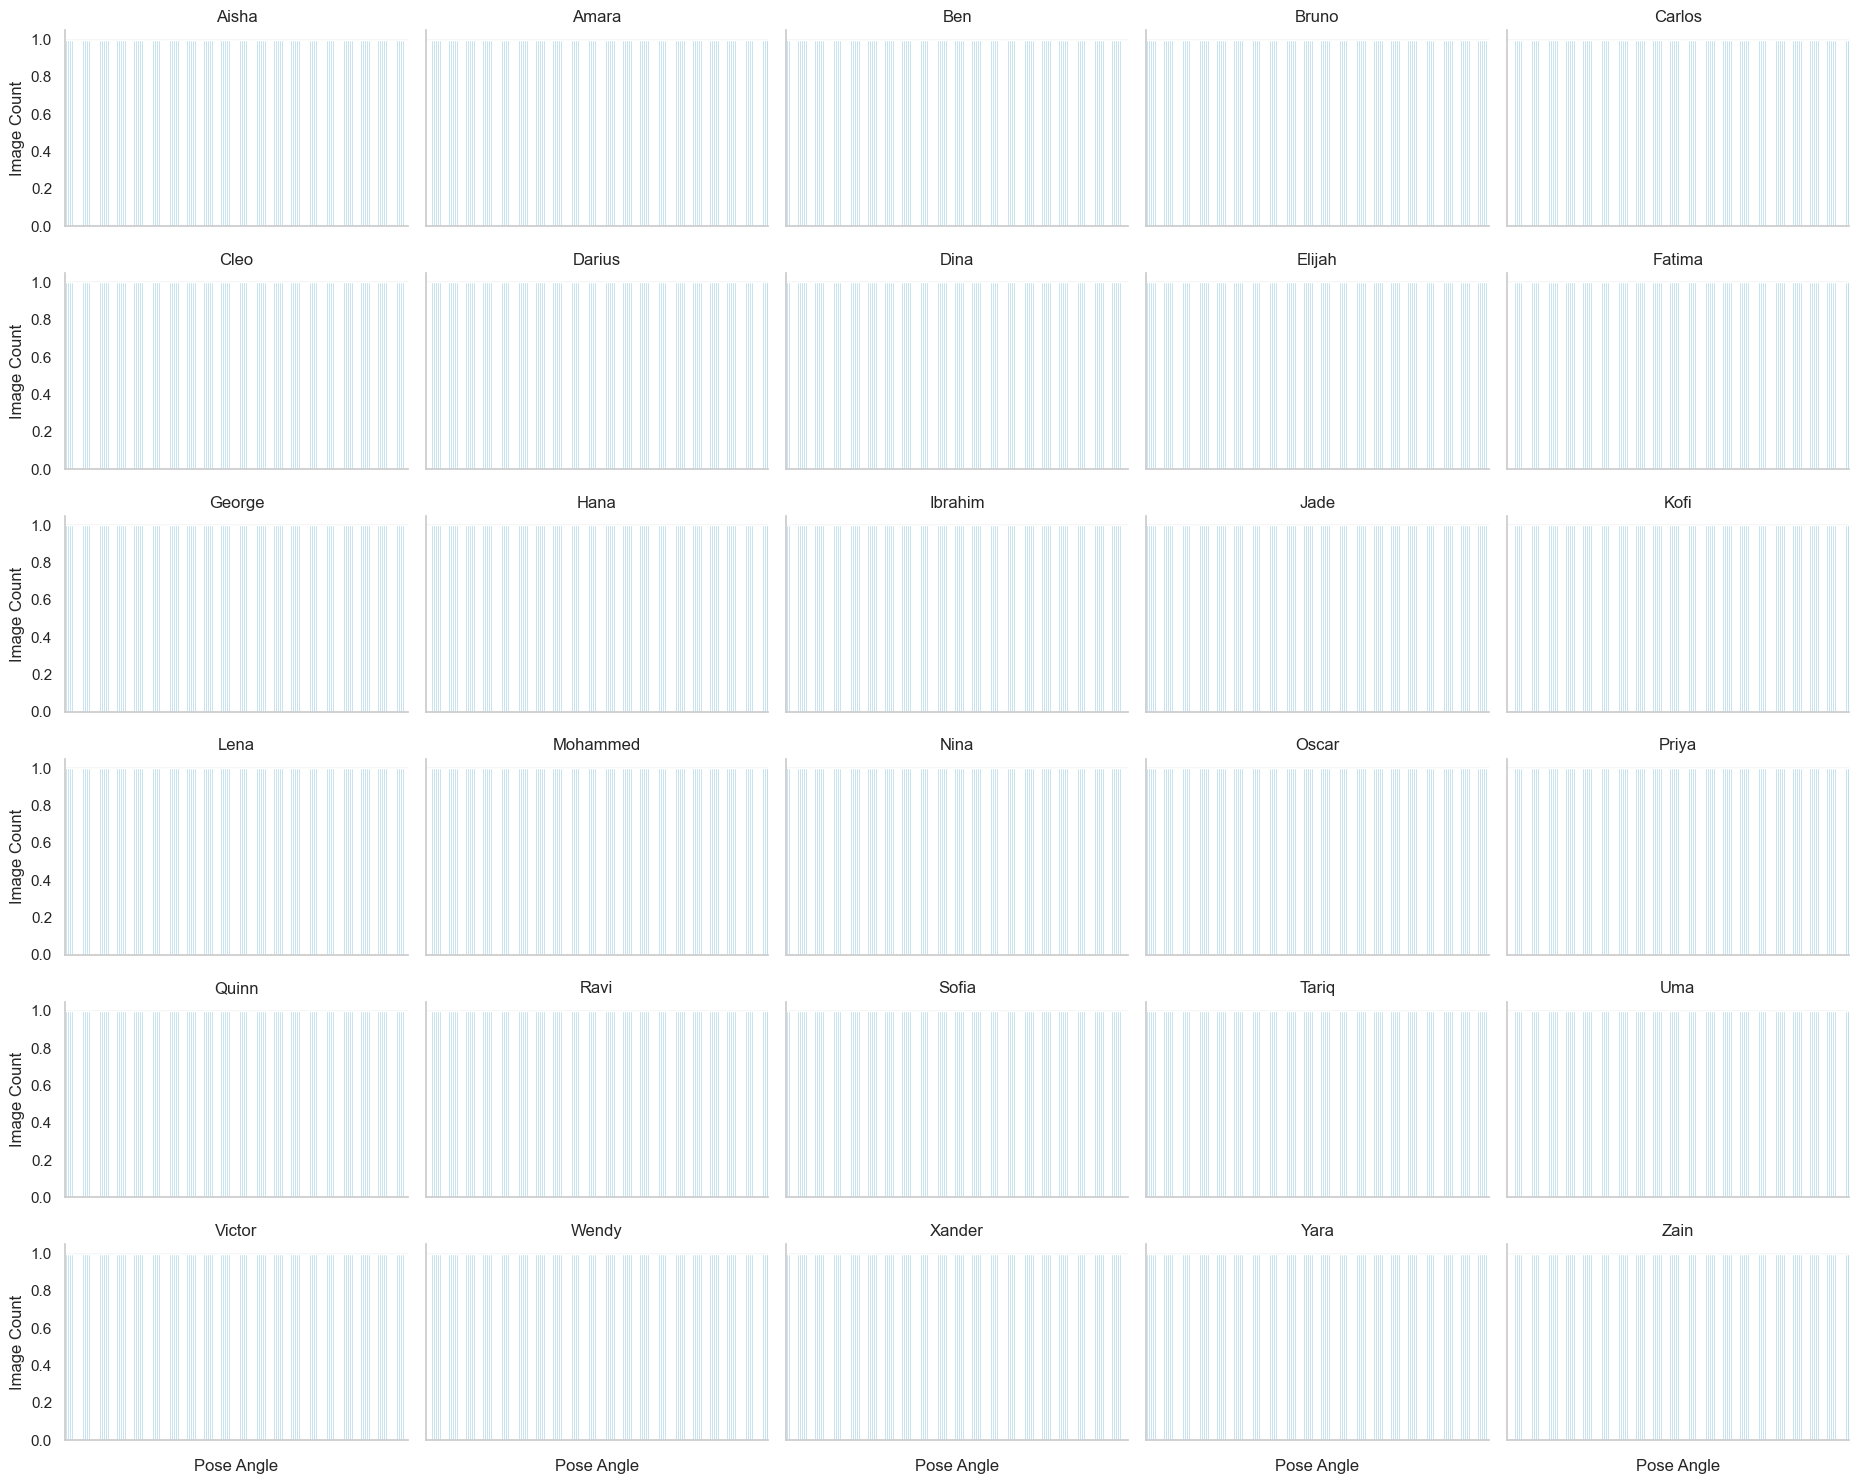

In [31]:
g = sns.FacetGrid(pose_counts, col="person_name", col_wrap=5, height=2.5, aspect=1.5)
g.map_dataframe(sns.barplot, x="pose_angle", y="count", color="skyblue")
g.set_xticklabels(rotation=45)
g.set_titles("{col_name}")
g.set_axis_labels("Pose Angle", "Image Count")
plt.tight_layout()
plt.show()

Showing image for: Ibrahim


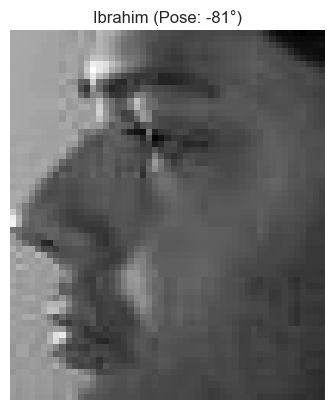

In [32]:
# Display a Face with the Person’s Name
import random

# Pick a random person (or set one manually like 'George')
selected_name = random.choice(df["person_name"].unique())
print(f"Showing image for: {selected_name}")

# Filter DataFrame for that person
person_df = df[df["person_name"] == selected_name]

# Pick a random image of that person
sample = person_df.sample(1).iloc[0]
image_path = sample["file_path"]

# Load image (grayscale)
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Show image
plt.imshow(img, cmap='gray')
plt.title(f"{selected_name} (Pose: {sample['pose_angle']}°)")
plt.axis('off')
plt.show()